# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import seaborn as sns
import pandas as pd
import sklearn as sk


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
import pydotplus

import os  
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

C:\Users\ninaw\AppData\Local\Temp\ipykernel_28636\1366005837.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# load the data
data = pd.read_excel('alldata.xlsx')

data_filtered = data.dropna()
data_filtered.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


In [12]:
# filter relevant columns
data_limited = data_filtered[["parti",
                     "alder",]]
data_filtered = data_filtered.loc[data_filtered['alder'] != 0]

data_limited.head()

,parti,alder
0,Moderaterne,78
1,Socialistisk Folkeparti,64
2,Alternativet,37
3,Alternativet,28
4,Løsgænger,58


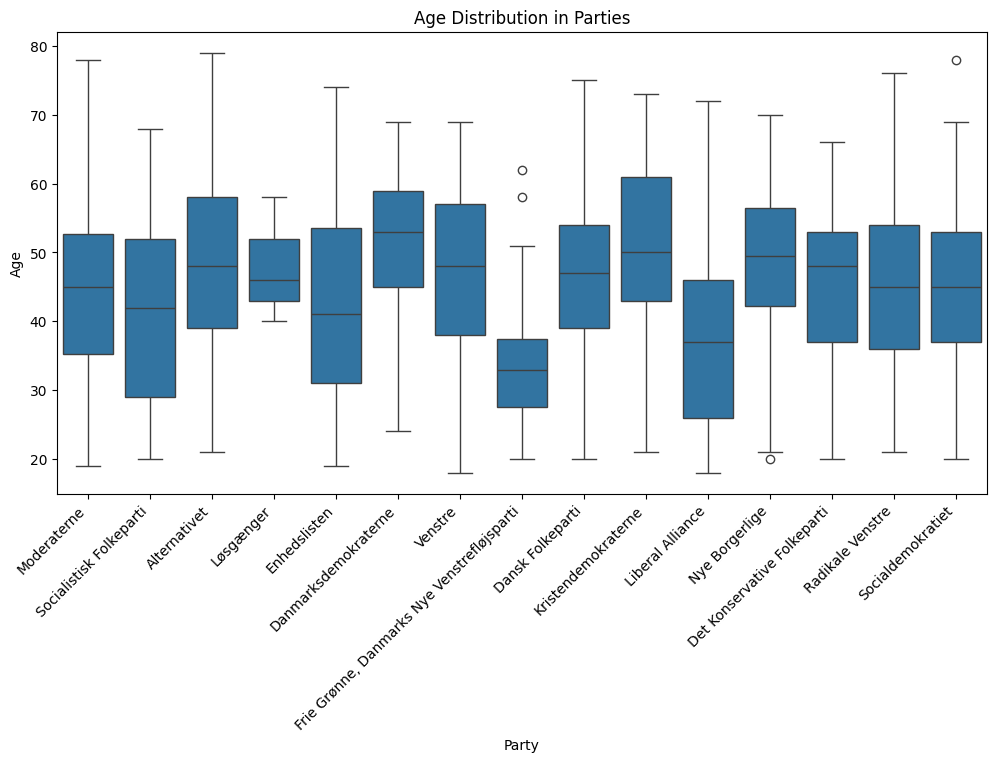

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parti', y='alder', data=data_filtered)
plt.xticks(rotation=45, ha='right')
plt.title('Age Distribution in Parties')
plt.xlabel('Party')
plt.ylabel('Age')
plt.show()

In [7]:
#Most of the candidates are between 40 and 50 years old
#The party with the biggest variety of ages is "Enhedlisten"
#"Alternativet" is a party with the oldest candidate

In [31]:
# An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

# filter relevant columns
data_limited = data_filtered[[
                    "navn",
                    "parti",
                    "530",
                    "531",
                    "533",
                    "534",
                    "535",
                    "537",
                    "538",
                    "540",
                    "541",
                    "543",
                    "544",
                    "545",
                    "546",
                    "547",
                    "548",
                    "550",
                    "551",
                    "552",
                    "553",
                    "555",
                    "556",
                    "557",
                    "559",
                    "561",
                     "1a",
                     "1b",
                     "2a",
                     "2b",
                     "3a",
                     "3b",
                     "4a",
                     "4b",
                     "5a",
                     "5b",
                     "6a",
                     "6b",
                     "7a",
                     "7b",
                     "8a",
                     "8b",
                     "9a",
                     "9b",
                     "10a",
                     "10b",
                     "11a",
                     "11b",
                     "12a",
                     "12b",]]

data_limited.head()

,navn,parti,530,531,533,534,535,537,538,540,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,Lars Philipsen Prahm,Moderaterne,-1,-2,1,-2,2,1,-2,1,...,1,0,2,0,1,-2,-2,1,1,1
1,Karsten Hønge,Socialistisk Folkeparti,2,2,-1,-2,-1,-2,1,-2,...,0,0,-2,0,-1,2,1,-2,0,0
2,Martin Kelleher-Petersen,Alternativet,2,1,-2,-2,1,-2,1,-1,...,1,1,-1,-2,0,2,0,-1,1,-2
3,Nicklas Gjedsig Larsen,Alternativet,2,1,-2,-1,1,1,1,1,...,2,2,-2,2,2,2,2,-1,2,0
4,Tom Gillesberg,Løsgænger,1,1,-2,2,-2,1,-2,1,...,1,0,-2,0,-1,0,-2,0,2,-2


In [35]:
# Calculate the value and count of the most frequent number in each row
count_per_row = data_limited.isin([-2, 2]).sum(axis=1)
#adding a new column
data_limited.loc[:, 'count'] = count_per_row

# Defining bin boundaries and category names
bins = [0, 20, 30, 40, np.inf]
labels = ['<20', '20-30', '30-40', '40+']

# Introducing price_range
# Create a new column 'price_range' with categorical values
data_prepared = data_limited
data_prepared['count_range'] = pd.cut(data_prepared['count'], bins=bins, labels=labels)
data_confident_candidates = data_prepared.loc[data_prepared['count_range'] == '40+']
data_confident_candidates = data_confident_candidates[["navn", "count", "count_range", "parti"]]
print(data_confident_candidates)

                    navn  count count_range  \
44     Mohamed Abdikarim     42         40+   
88         Søren Vanting     48         40+   
151     Elise Bjerkrheim     41         40+   
152           Rashid Ali     42         40+   
284           John Bjerg     41         40+   
359       Frank Sørensen     41         40+   
437  Lone Vase Langballe     41         40+   
503          Jan Filbært     41         40+   
505         Sarah Nørris     48         40+   
559  Kim Andkjær Doberck     43         40+   
637          Simon Hampe     41         40+   

                                           parti  
44   Frie Grønne, Danmarks Nye Venstrefløjsparti  
88                   Det Konservative Folkeparti  
151  Frie Grønne, Danmarks Nye Venstrefløjsparti  
152  Frie Grønne, Danmarks Nye Venstrefløjsparti  
284                               Nye Borgerlige  
359                             Dansk Folkeparti  
437                             Dansk Folkeparti  
503                        

C:\Users\ninaw\AppData\Local\Temp\ipykernel_28636\570778463.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prepared['count_range'] = pd.cut(data_prepared['count'], bins=bins, labels=labels)


In [33]:
df_sorted = data_confident_candidates.sort_values(by='count', ascending=False)
df_sorted = df_sorted[["navn", "parti", "count"]]
print(df_sorted)

                    navn                                        parti  count
88         Søren Vanting                  Det Konservative Folkeparti     48
505         Sarah Nørris                                 Enhedslisten     48
559  Kim Andkjær Doberck                               Nye Borgerlige     43
44     Mohamed Abdikarim  Frie Grønne, Danmarks Nye Venstrefløjsparti     42
152           Rashid Ali  Frie Grønne, Danmarks Nye Venstrefløjsparti     42
151     Elise Bjerkrheim  Frie Grønne, Danmarks Nye Venstrefløjsparti     41
284           John Bjerg                               Nye Borgerlige     41
359       Frank Sørensen                             Dansk Folkeparti     41
437  Lone Vase Langballe                             Dansk Folkeparti     41
503          Jan Filbært                                 Enhedslisten     41
637          Simon Hampe                             Dansk Folkeparti     41


In [17]:
# Group the data
grouped_data = data_filtered[['parti']]
print(grouped_data)

                       parti
0                Moderaterne
1    Socialistisk Folkeparti
2               Alternativet
3               Alternativet
4                  Løsgænger
..                       ...
862        Socialdemokratiet
863        Socialdemokratiet
864        Socialdemokratiet
865        Socialdemokratiet
866        Socialdemokratiet

[851 rows x 1 columns]


In [39]:
#Sort members of one particular party
#For each question we find the average 
#Calculate diviation from average for each member of the party

In [38]:
#Moderaterne

#Sort members of one particular party
moderaterne_party = data_limited[data_limited['parti'] == 'Moderaterne']
print(moderaterne_party)

                                       navn        parti  530  531  533  534  \
0                      Lars Philipsen Prahm  Moderaterne   -1   -2    1   -2   
6                                Johan Kahl  Moderaterne    1    2   -1   -2   
54                 Henrik Rejnholt Andersen  Moderaterne    1    1    1   -2   
55                            Karin Liltorp  Moderaterne    1   -1   -1   -2   
56                               Peter Have  Moderaterne    1    1    1   -2   
58                 Tobias Grotkjær Elmstrøm  Moderaterne    1    1    1   -2   
157                            Ellen Emilie  Moderaterne    2    1    1   -2   
158                          Jørgen Kjøller  Moderaterne    1    2    2   -2   
161               Marina Fløjgaard Andersen  Moderaterne    1    1    1   -2   
162                     Nanna W. Gotfredsen  Moderaterne    1    1   -1   -2   
163                   Jon Læssøe Stephensen  Moderaterne    2    2   -2   -2   
164                         Louise David

In [42]:
#average for each question
moderaterne_party_answers = moderaterne_party[[
                    "530",
                    "531",
                    "533",
                    "534",
                    "535",
                    "537",
                    "538",
                    "540",
                    "541",
                    "543",
                    "544",
                    "545",
                    "546",
                    "547",
                    "548",
                    "550",
                    "551",
                    "552",
                    "553",
                    "555",
                    "556",
                    "557",
                    "559",
                    "561",
                     "1a",
                     "1b",
                     "2a",
                     "2b",
                     "3a",
                     "3b",
                     "4a",
                     "4b",
                     "5a",
                     "5b",
                     "6a",
                     "6b",
                     "7a",
                     "7b",
                     "8a",
                     "8b",
                     "9a",
                     "9b",
                     "10a",
                     "10b",
                     "11a",
                     "11b",
                     "12a",
                     "12b",]]

averages = moderaterne_party_answers.mean()
print(averages)

530    0.642857
531    0.904762
533   -0.285714
534   -1.904762
535    1.404762
537    0.619048
538   -1.857143
540    1.119048
541    0.047619
543    0.880952
544    0.023810
545    1.214286
546    1.190476
547    1.976190
548    0.238095
550    0.261905
551   -1.238095
552    0.880952
553   -1.023810
555   -0.904762
556    1.428571
557    1.166667
559    0.238095
561   -0.380952
1a    -0.571429
1b     0.380952
2a     1.428571
2b     1.523810
3a     1.285714
3b    -0.166667
4a     0.095238
4b    -0.071429
5a    -0.238095
5b     0.428571
6a     0.333333
6b    -0.785714
7a     1.000000
7b     0.619048
8a     1.380952
8b     0.404762
9a     0.976190
9b    -0.285714
10a    1.071429
10b   -1.142857
11a   -1.309524
11b    1.380952
12a    0.928571
12b   -0.357143
dtype: float64
